In [1]:
from rdkit import Chem
from rdkit.Chem import Draw

In [38]:
with open("render/final_molecules.smiles") as doc:
    all_smiles = doc.read().split("\n")
print(len(all_smiles))

217


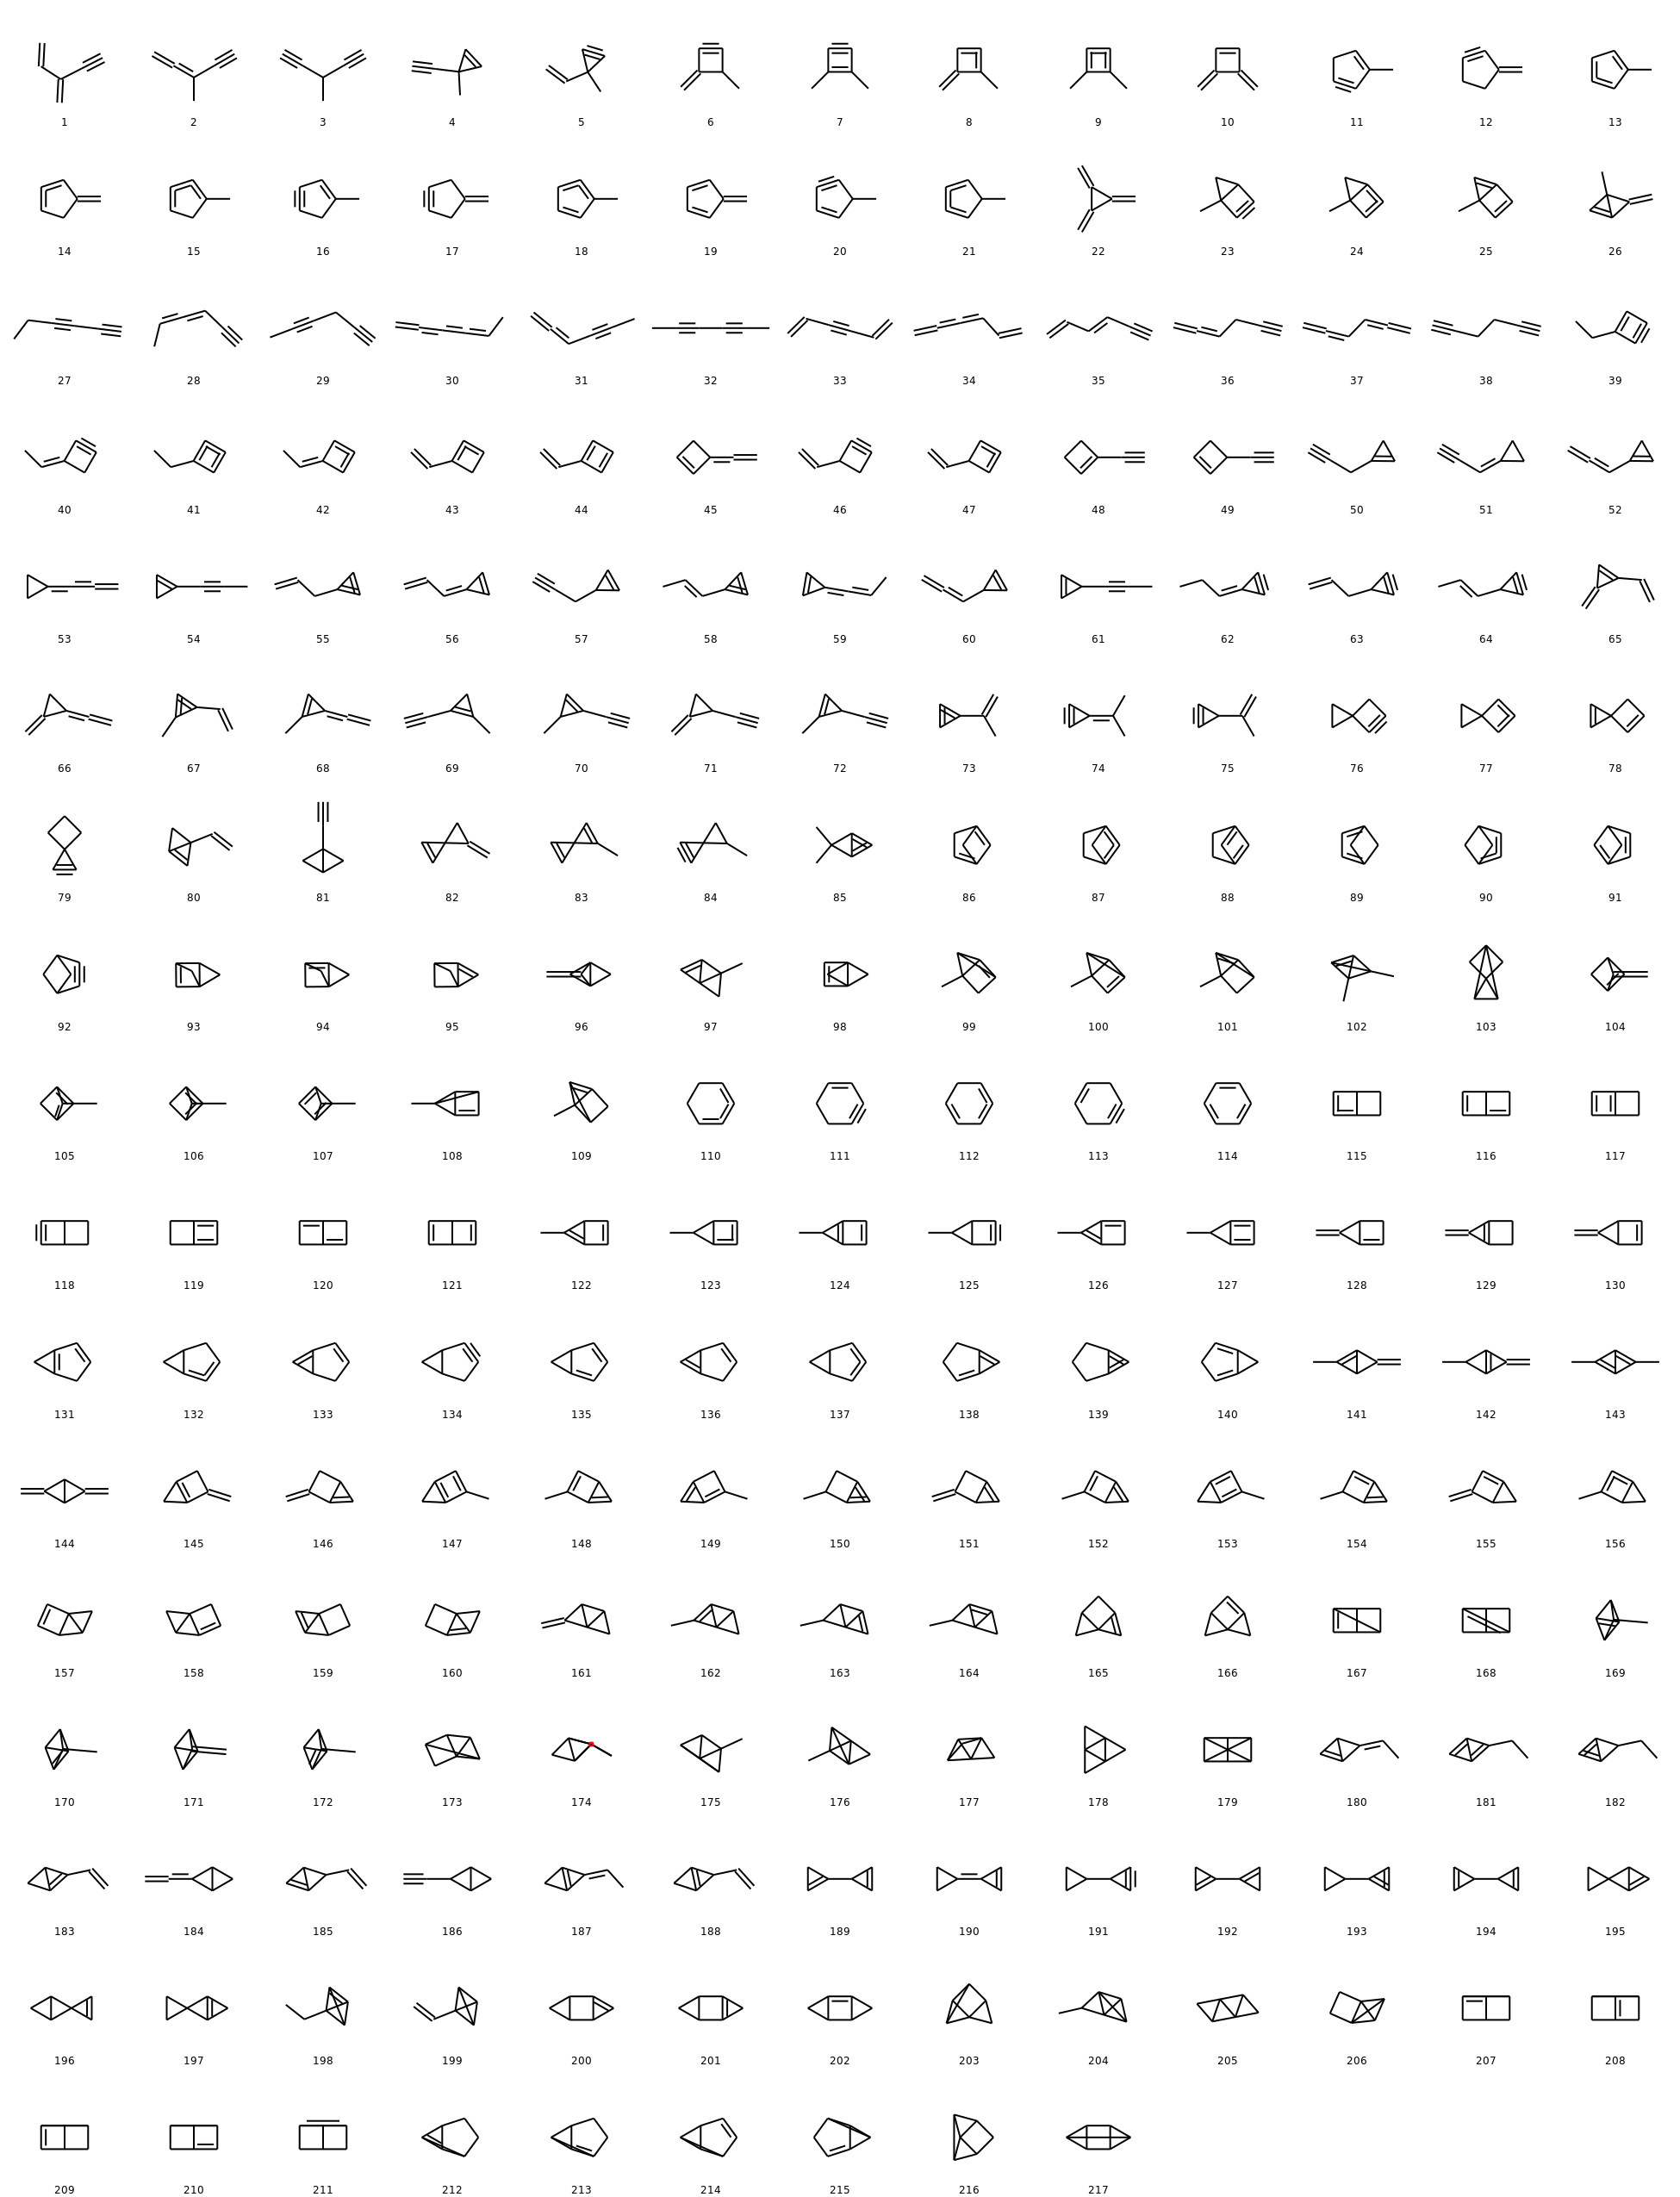

In [45]:
Draw.MolsToGridImage(
    [Chem.MolFromSmiles(i) for i in all_smiles[:]],
    molsPerRow=13,
    subImgSize=(150, 150),
    legends=[str(i+1) for i in range(len(all_smiles))]
)

In [50]:
with open("poster_with_indices.svg", "w") as out:
    out.write(
        Draw._MolsToGridSVG(
            [Chem.MolFromSmiles(i) for i in all_smiles[:]],
            molsPerRow=13,
            subImgSize=(160, 160),
            legends=[str(i+1) for i in range(len(all_smiles))]
        )
    )

In [28]:
m = Chem.MolFromSmiles(all_smiles[13])

In [30]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from sklearn.neighbors import NearestNeighbors
import numpy

# generate four molecules

mols = [Chem.MolFromSmiles(i) for i in all_smiles]

# generate fingeprints: Morgan fingerprint with radius 2
fps = [AllChem.GetMorganFingerprintAsBitVect(m, 3, 4096) for m in mols]

# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = numpy.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

neigh = NearestNeighbors()
neigh.fit(np_fps)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

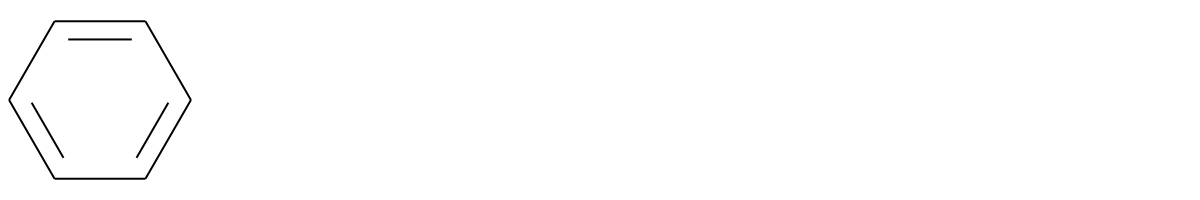

In [31]:
Draw.MolsToGridImage([Chem.MolFromSmiles(i) for i in all_smiles[216:217]], molsPerRow=6)

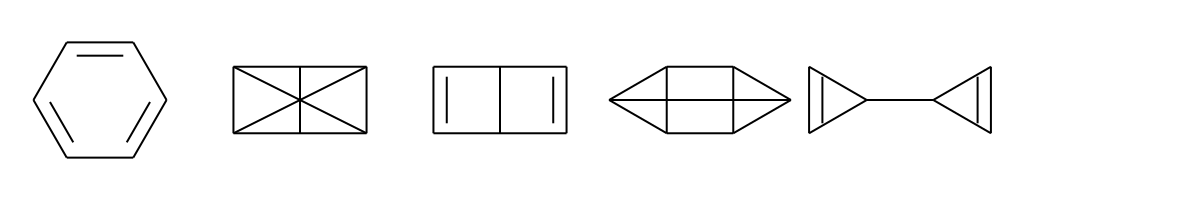

In [32]:
Draw.MolsToGridImage(
    [
        Chem.MolFromSmiles(all_smiles[i]) for i in neigh.kneighbors(
            [fps[216]],
            return_distance=False
        )[0]
    ],
    molsPerRow=6
)

**Вывод:** K nearest neighbors не подходит.

### K means

In [6]:
from sklearn.cluster import KMeans

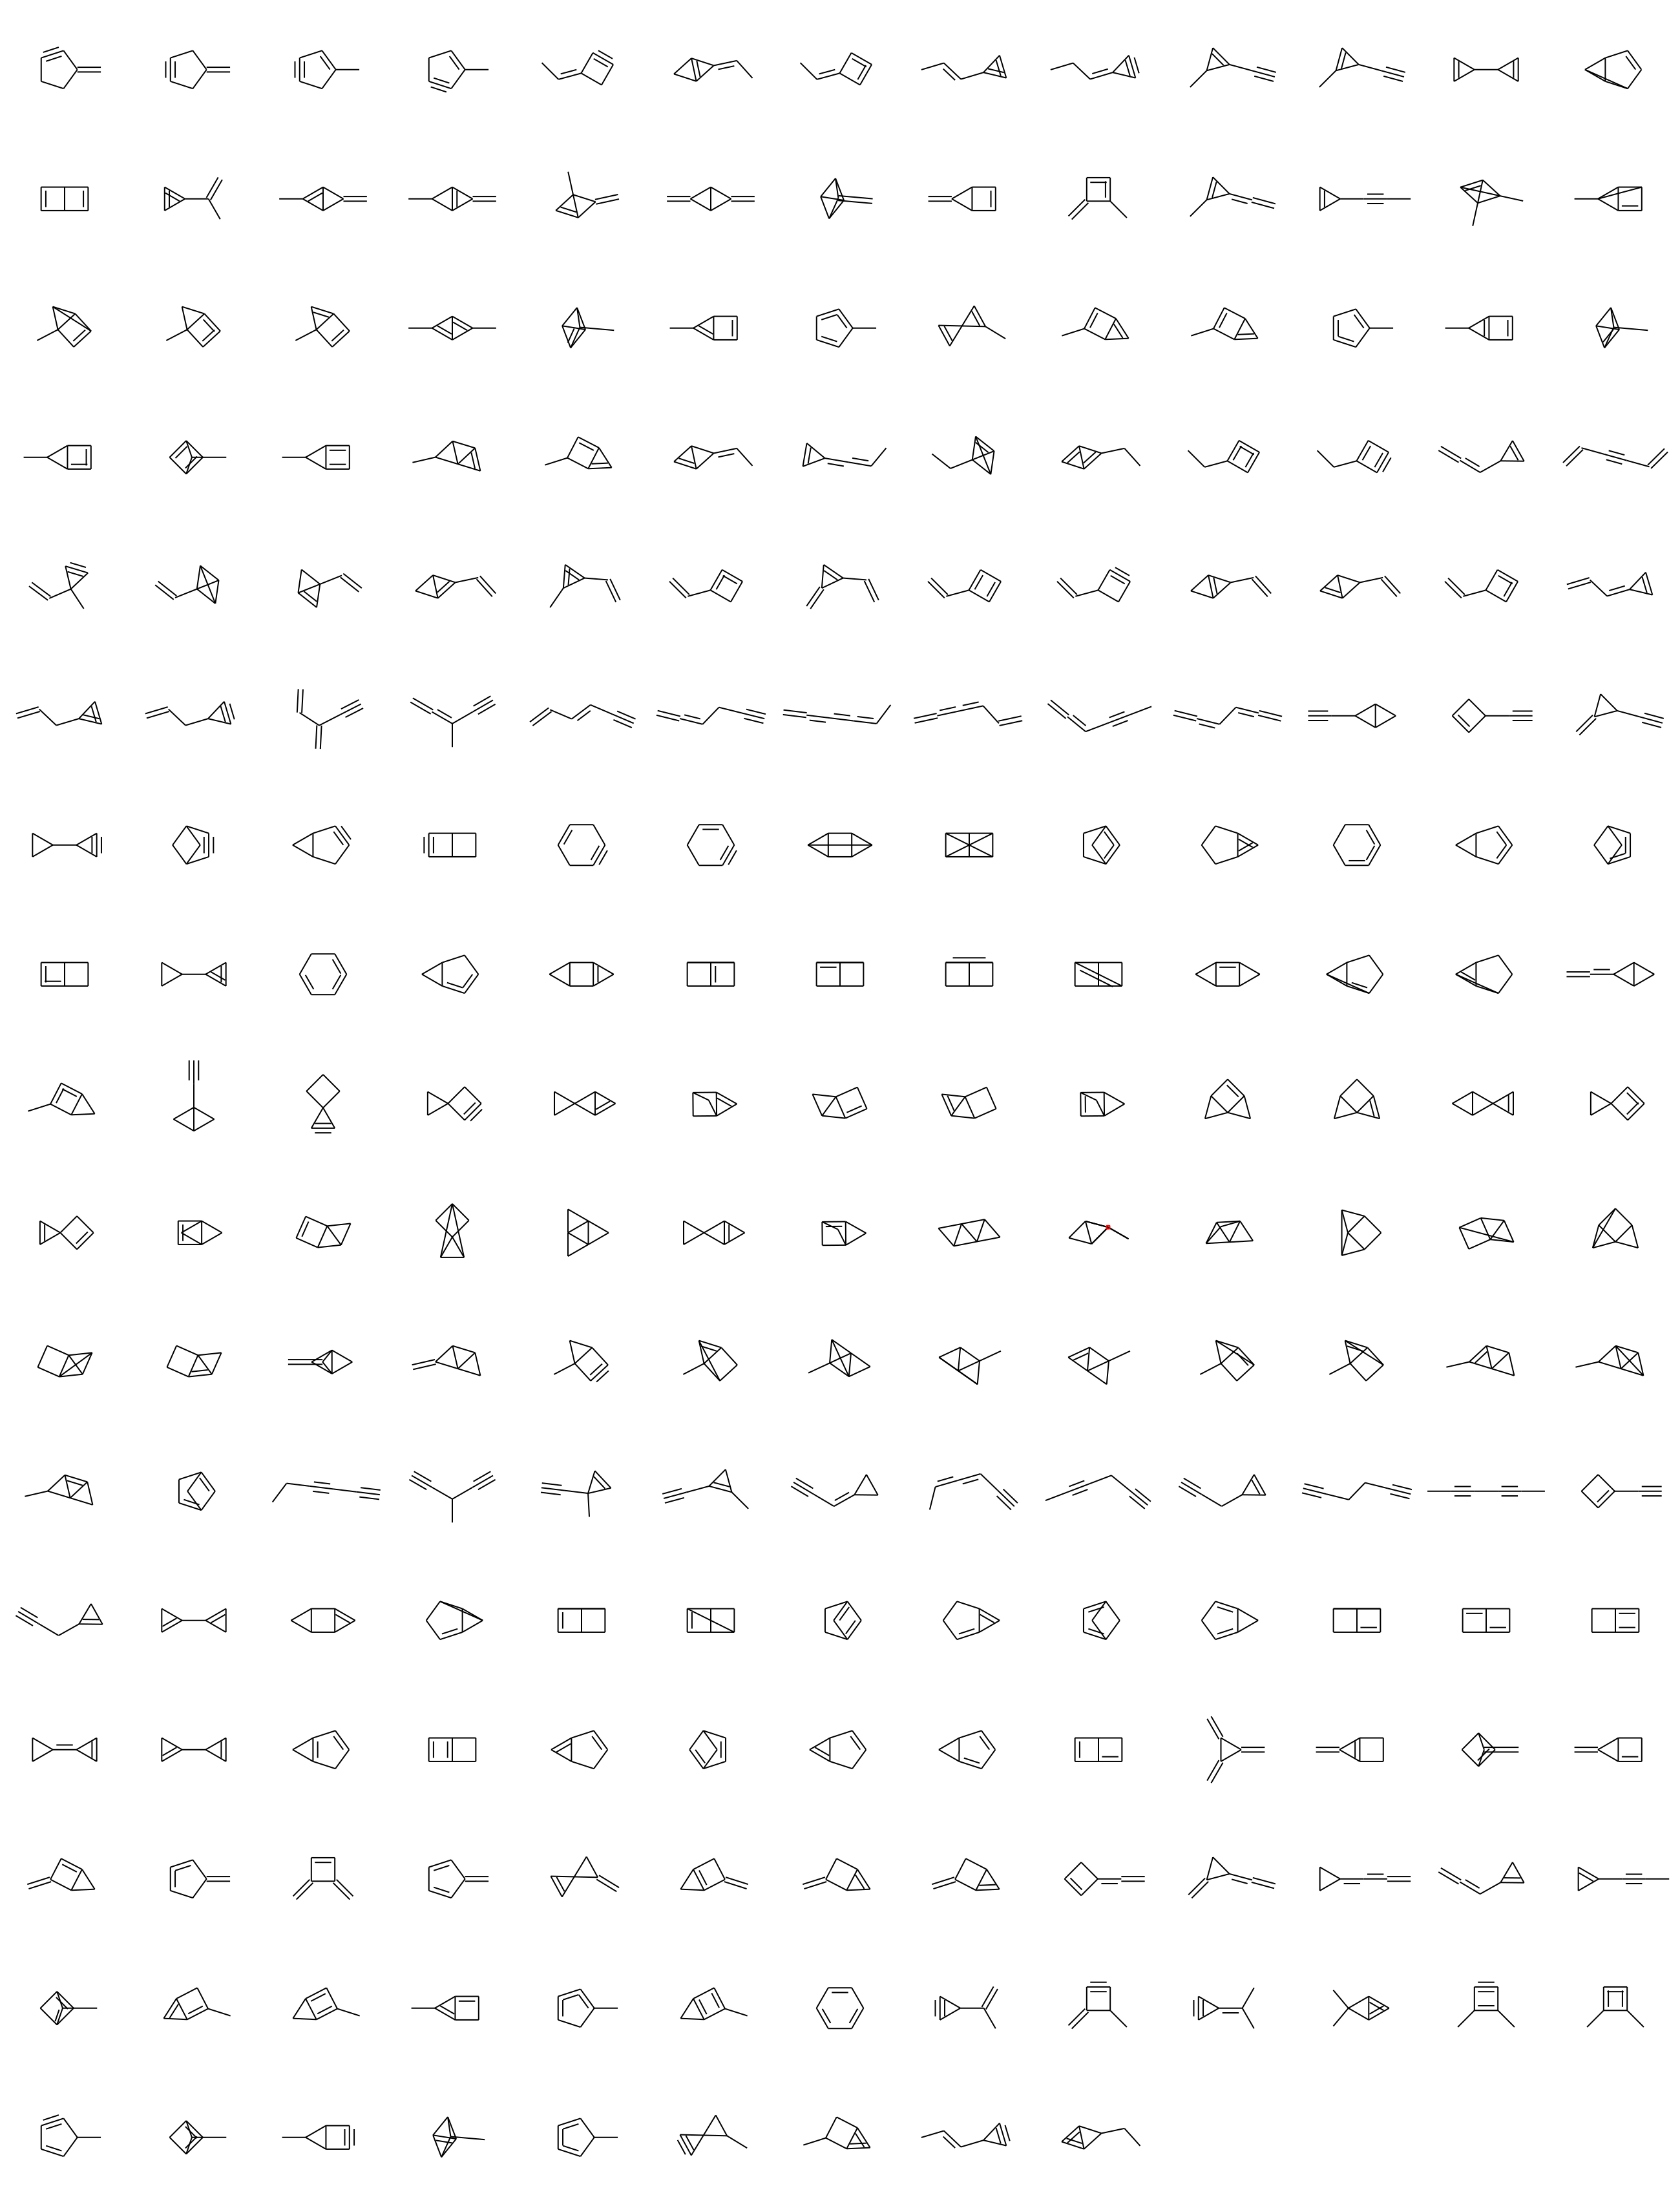

In [24]:
kmeans = KMeans(n_clusters=10).fit(fps)

predictions = kmeans.predict(fps)
#Draw.MolsToGridImage([Chem.MolFromSmiles(i) for i in all_smiles], molsPerRow=10, legends=[str(i) for i in predictions])
tmp = sorted(tuple(zip(predictions, all_smiles)))
labels = [i[0] for i in tmp]
new_smiles = [i[1] for i in tmp]

Draw.MolsToGridImage([Chem.MolFromSmiles(i) for i in new_smiles], molsPerRow=13)